In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [76]:
#import data
data = pd.read_csv('train_kaggle_homesale.csv')

#extract relevant data segment
data_trimmed = data[['Id', 'HouseStyle', 'SaleCondition', 'LotArea', 'OverallQual', 'OverallCond', 'TotRmsAbvGrd', 'SalePrice']]

#extract only numerical cols
data_trimmed_num = data_trimmed.loc[:, 'LotArea':'SalePrice'].dropna()

data_trimmed_num.head()

,LotArea,OverallQual,OverallCond,TotRmsAbvGrd,SalePrice
0,8450,7,5,8,208500
1,9600,6,8,6,181500
2,11250,7,5,6,223500
3,9550,7,5,7,140000
4,14260,8,5,9,250000


In [77]:
#rescale all numerical cols to 0-1
for col in data_trimmed_num:
    data_trimmed_num[col] = data_trimmed_num[col]/max(data_trimmed_num[col])
data_trimmed_num.head() 

,LotArea,OverallQual,OverallCond,TotRmsAbvGrd,SalePrice
0,0.039258,0.7,0.555556,0.571429,0.276159
1,0.044600,0.6,0.888889,0.428571,0.240397
2,0.052266,0.7,0.555556,0.428571,0.296026
3,0.044368,0.7,0.555556,0.500000,0.185430
4,0.066250,0.8,0.555556,0.642857,0.331126


In [78]:
#add jitter to all the cols for better scatter plot visibility

# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(data_trimmed_num.shape)),
    columns=data_trimmed_num.columns
)

# Combine the data and the noise.
data_trimmed_num_jittered = data_trimmed_num.add(jitter)
data_trimmed_num_jittered.head()

,LotArea,OverallQual,OverallCond,TotRmsAbvGrd,SalePrice
0,0.212243,0.511367,0.604036,0.312987,0.573265
1,0.069217,0.417850,0.866736,0.332182,-0.014004
2,0.303301,0.631473,0.645656,0.589651,0.217235
3,0.218084,0.534430,0.805827,0.683340,0.436306
4,0.219217,0.619563,0.503211,0.787876,0.240495


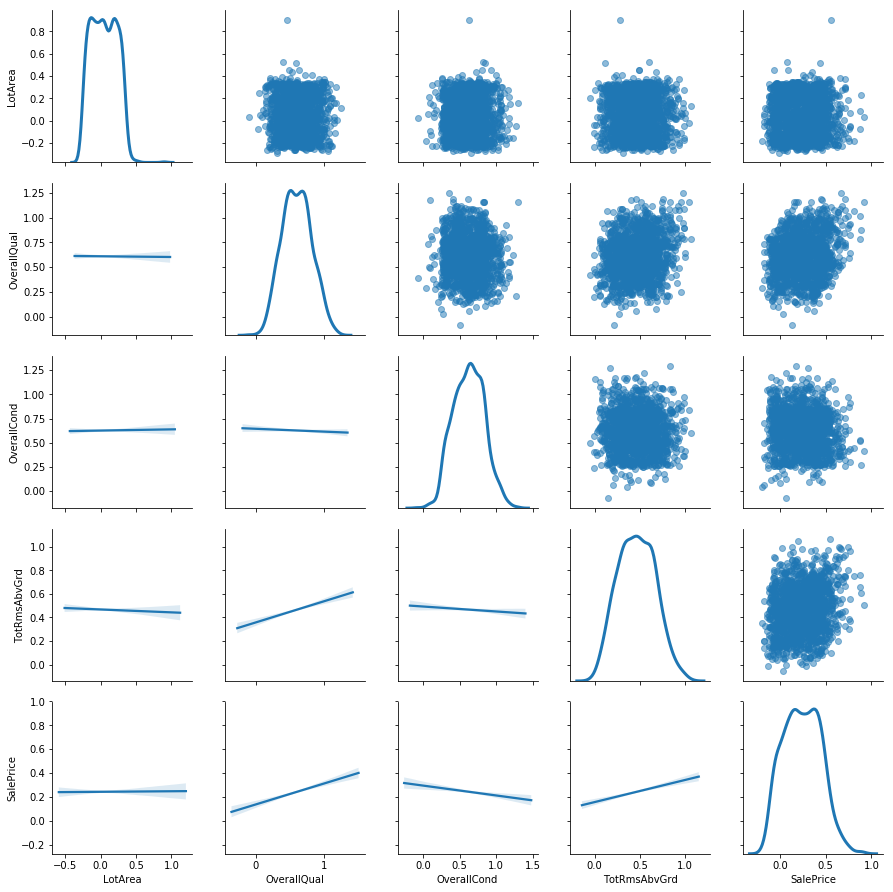

In [79]:
g = sns.PairGrid(data_trimmed_num_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [80]:
# Make the correlation matrix.

corrmat = data_trimmed_num_jittered.corr()
corrmat

,LotArea,OverallQual,OverallCond,TotRmsAbvGrd,SalePrice
LotArea,1.000000,-0.006004,0.010411,-0.021124,0.004090
OverallQual,-0.006004,1.000000,-0.030364,0.189499,0.187534
OverallCond,0.010411,-0.030364,1.000000,-0.042869,-0.085481
TotRmsAbvGrd,-0.021124,0.189499,-0.042869,1.000000,0.187320
SalePrice,0.004090,0.187534,-0.085481,0.187320,1.000000


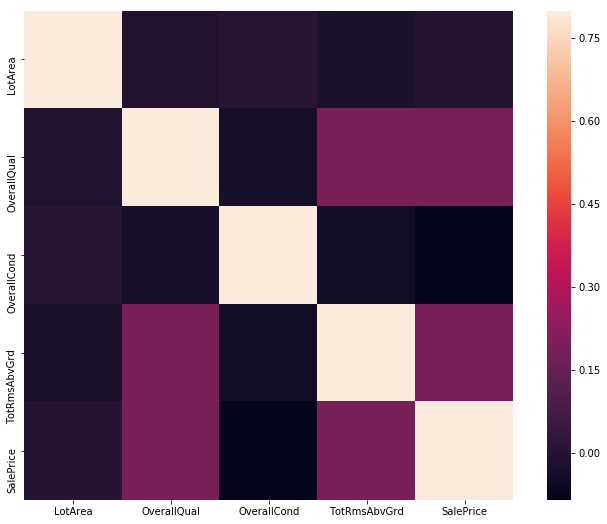

In [81]:
#create the heat map

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

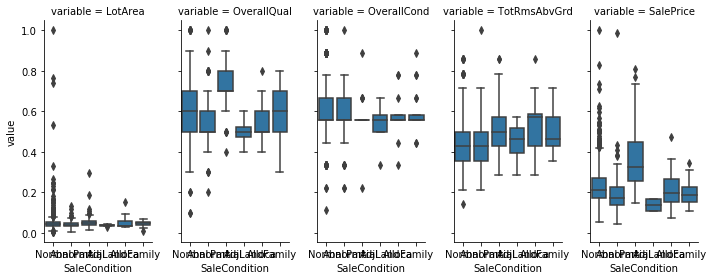

In [97]:
# Plot all the variables with boxplots for each SaleCondition
#print(data_trimmed.groupby('SaleCondition').describe())
# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
data_trimmed_num[['SaleCondition']] = data_trimmed[['SaleCondition']]
#print(data_trimmed_num.head())
df_long = data_trimmed_num[['SaleCondition', 'LotArea', 'OverallQual', 'OverallCond', 'TotRmsAbvGrd', 'SalePrice']].dropna()
df_long = pd.melt(df_long, id_vars=['SaleCondition'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "SaleCondition", "value")
plt.show()

